In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


from subprocess import check_output
print(check_output(["ls", "./input"]).decode("utf8")) #check the files available in the directory

sample_submission.csv
test.csv
train.csv



In [2]:
#Now let's import and put the train and test datasets in  pandas dataframe

train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')

In [3]:
##display the first five rows of the train dataset.
train.head(5)

,ID,appearedTimeOfDay,appearedHour,appearedMinute,terrainType,closeToWater,city,continent,weather,temperature,...,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151,class
0,NzM4OTYzMzQxNTMyNzc1MDQ0NQ==,evening,19,10,13,False,Bangkok,Asia,Clear,27.800,...,False,False,False,False,False,False,False,False,False,2
1,NDEwMjE0MzYwNzUyMjE2OTI0NQ==,night,5,19,13,True,New_York,America,Clear,26.100,...,False,False,False,False,False,False,False,False,False,5
2,OTQ3NzU5MTA4MzgzODg2NzYxMw==,evening,19,46,0,True,New_York,America,Clear,24.700,...,False,False,False,False,False,False,False,False,False,3
3,MTU2OTA5MTcyMDMzOTc0NzczODk=,morning,11,10,0,True,Hobart,Australia,Clear,12.700,...,False,False,False,False,False,False,False,False,False,4
4,NTE2OTkxNjE3OTUzODY0MTE4MQ==,evening,18,32,13,True,Los_Angeles,America,PartlyCloudy,19.100,...,False,False,False,False,False,False,False,False,False,3


In [4]:
train.describe()

,appearedHour,appearedMinute,terrainType,temperature,windSpeed,pressure,population_density,gymDistanceKm,pokestopDistanceKm,class
count,7160.000,7160.000,7160.000,7160.000,7160.000,7160.000,7160.000,7160.000,7160.000,7160.000
mean,10.715,30.654,9.767,23.276,7.536,1014.900,1532.785,2.850,0.468,2.375
std,7.181,17.493,4.907,6.043,4.622,5.845,2216.693,50.348,3.319,1.806
min,0.000,0.000,0.000,4.800,0.000,996.330,0.000,0.005,0.000,0.000
25%,4.000,16.000,7.000,18.500,3.930,1010.660,86.498,0.178,0.050,1.000
50%,10.000,32.000,13.000,23.800,6.650,1015.290,635.550,0.309,0.132,2.000
75%,17.000,46.000,13.000,27.500,9.990,1019.320,1955.864,0.577,0.306,4.000
max,23.000,59.000,16.000,41.200,56.130,1034.170,10000.000,3859.425,199.830,5.000


In [5]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['ID']
test_ID = test['id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("ID", axis = 1, inplace = True)
test.drop("id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (7160, 184) 
The test data size before dropping Id feature is : (1791, 183) 

The train data size after dropping Id feature is : (7160, 183) 
The test data size after dropping Id feature is : (1791, 182) 


In [6]:
#correlation map
# f,ax = plt.subplots(figsize=(22, 22))
# sns.heatmap(train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
# plt.show()

# 1. Data Processing

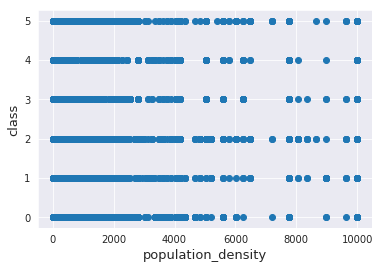

In [7]:
fig, ax = plt.subplots()
ax.scatter(x = train['population_density'], y = train['class'])
plt.ylabel('class', fontsize=13)
plt.xlabel('population_density', fontsize=13)
plt.show()


 mu = 1014.90 and sigma = 5.84



/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'pressure distribution')

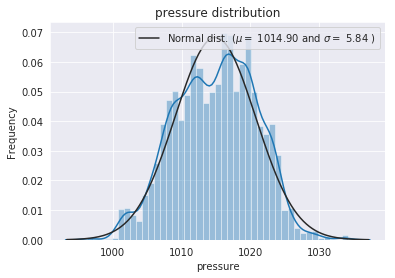

In [8]:
sns.distplot(train['pressure'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['pressure'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('pressure distribution')


 mu = 23.28 and sigma = 6.04



/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'temperature distribution')

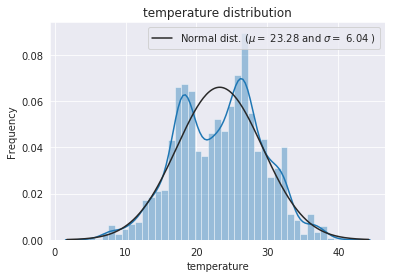

In [9]:
sns.distplot(train['temperature'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['temperature'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('temperature distribution')


 mu = 7.54 and sigma = 4.62



/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'windSpeed distribution')

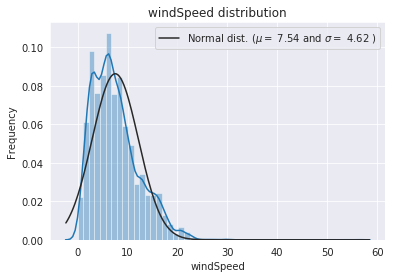

In [10]:
sns.distplot(train['windSpeed'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['windSpeed'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('windSpeed distribution')

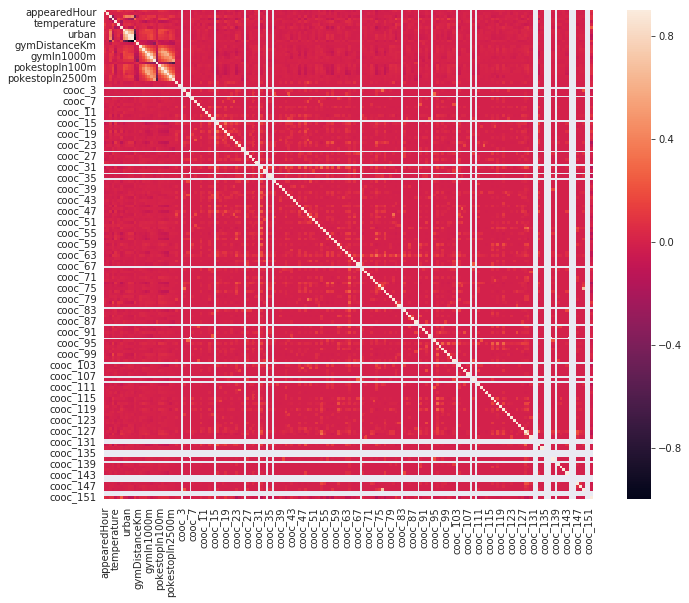

In [11]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [12]:
##Features engineering
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train['class'].values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['class'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (8951, 182)


In [13]:
###Missing Data
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio


In [14]:
# limit to categorical data using df.select_dtypes()
X = all_data.select_dtypes(include=[object])
X.head(3)

,appearedTimeOfDay,city,continent,weather,weatherIcon
0,evening,Bangkok,Asia,Clear,clear-day
1,night,New_York,America,Clear,clear-night
2,evening,New_York,America,Clear,clear-day


In [15]:
# Applay Boolean Map
bool_map = {True:1, False:0}
all_data = all_data.applymap(lambda x: bool_map.get(x,x))
all_data.head()

,appearedHour,appearedMinute,appearedTimeOfDay,city,closeToWater,continent,cooc_1,cooc_10,cooc_100,cooc_101,...,population_density,pressure,rural,suburban,temperature,terrainType,urban,weather,weatherIcon,windSpeed
0,19,10,evening,Bangkok,0,Asia,0,1,0,0,...,6019.044,1008.960,0,1,27.800,13,1,Clear,clear-day,9.000
1,5,19,night,New_York,1,America,0,0,0,0,...,0.000,1018.960,1,0,26.100,13,0,Clear,clear-night,8.700
2,19,46,evening,New_York,1,America,0,0,0,0,...,0.000,1023.220,1,0,24.700,0,0,Clear,clear-day,16.820
3,11,10,morning,Hobart,1,Australia,0,0,0,0,...,128.895,1014.190,1,0,12.700,0,0,Clear,clear-night,13.250
4,18,32,evening,Los_Angeles,1,America,0,0,0,0,...,4188.391,1011.360,0,1,19.100,13,1,PartlyCloudy,partly-cloudy-day,5.780


In [16]:
# Adding total sqfootage feature 
all_data['appearedTime'] = all_data['appearedHour']*60 + all_data['appearedMinute']
all_data.head()

,appearedHour,appearedMinute,appearedTimeOfDay,city,closeToWater,continent,cooc_1,cooc_10,cooc_100,cooc_101,...,pressure,rural,suburban,temperature,terrainType,urban,weather,weatherIcon,windSpeed,appearedTime
0,19,10,evening,Bangkok,0,Asia,0,1,0,0,...,1008.960,0,1,27.800,13,1,Clear,clear-day,9.000,1150
1,5,19,night,New_York,1,America,0,0,0,0,...,1018.960,1,0,26.100,13,0,Clear,clear-night,8.700,319
2,19,46,evening,New_York,1,America,0,0,0,0,...,1023.220,1,0,24.700,0,0,Clear,clear-day,16.820,1186
3,11,10,morning,Hobart,1,Australia,0,0,0,0,...,1014.190,1,0,12.700,0,0,Clear,clear-night,13.250,670
4,18,32,evening,Los_Angeles,1,America,0,0,0,0,...,1011.360,0,1,19.100,13,1,PartlyCloudy,partly-cloudy-day,5.780,1112


In [17]:
# limit to categorical data using df.select_dtypes()
X = all_data.select_dtypes(include=[object])
X.head(3)

,appearedTimeOfDay,city,continent,weather,weatherIcon
0,evening,Bangkok,Asia,Clear,clear-day
1,night,New_York,America,Clear,clear-night
2,evening,New_York,America,Clear,clear-day


In [18]:
# **Transforming some numerical variables that are really categorical**
all_data['terrainType'] = all_data['terrainType'].apply(str)



In [19]:
# limit to categorical data using df.select_dtypes()
X = all_data.select_dtypes(include=[object])
X.head(3)

,appearedTimeOfDay,city,continent,terrainType,weather,weatherIcon
0,evening,Bangkok,Asia,13,Clear,clear-day
1,night,New_York,America,13,Clear,clear-night
2,evening,New_York,America,0,Clear,clear-day


In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

cols = ('city','continent','weatherIcon','appearedTimeOfDay','weather','terrainType')
#process columns, apply LabelEncoder to categorical features
# for c in cols:
#     label_encoder = LabelEncoder()
#     all_data[c] = label_encoder.fit_transform(all_data[c])
#     one_hot_encoder = OneHotEncoder(sparse=False)
#     all_data = pd.concat((all_data,pd.DataFrame(one_hot_encoder.fit_transform(all_data[c].values.reshape(-1,1)))),1)
#     # all_data.drop(c, axis = 1, inplace = True)
all_data = pd.get_dummies(all_data)
print('Shape all_data: {}'.format(all_data.shape))
all_data.head()

Shape all_data: (8951, 312)


,appearedHour,appearedMinute,closeToWater,cooc_1,cooc_10,cooc_100,cooc_101,cooc_102,cooc_103,cooc_104,...,weather_WindyandFoggy,weather_WindyandPartlyCloudy,weatherIcon_clear-day,weatherIcon_clear-night,weatherIcon_cloudy,weatherIcon_fog,weatherIcon_partly-cloudy-day,weatherIcon_partly-cloudy-night,weatherIcon_rain,weatherIcon_wind
0,19,10,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5,19,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,19,46,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,11,10,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,18,32,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Normalization numeric
https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame

In [21]:
# appearedHour/appearedMinute 
# temperature - temperature in celsius at the location of a sighting (numeric)
# windSpeed - speed of the wind in km/h at the location of a sighting (numeric)
# pressure - atmospheric pressure in bar at the location of a sighting (numeric)
# gymDistanceKm, pokestopDistanceKm
cols = ('appearedHour','appearedMinute','temperature','windSpeed','pressure','population_density','gymDistanceKm','pokestopDistanceKm','appearedTime')

for feature_name in cols:
    mean_value = all_data[feature_name].mean()
    std_value = all_data[feature_name].std()
    all_data[feature_name] = (all_data[feature_name] - mean_value) / std_value

all_data.head()

,appearedHour,appearedMinute,closeToWater,cooc_1,cooc_10,cooc_100,cooc_101,cooc_102,cooc_103,cooc_104,...,weather_WindyandFoggy,weather_WindyandPartlyCloudy,weatherIcon_clear-day,weatherIcon_clear-night,weatherIcon_cloudy,weatherIcon_fog,weatherIcon_partly-cloudy-day,weatherIcon_partly-cloudy-night,weatherIcon_rain,weatherIcon_wind
0,1.167,-1.184,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,-0.791,-0.668,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1.167,0.881,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0.048,-1.184,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1.027,0.078,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [22]:
all_data.describe()

,appearedHour,appearedMinute,closeToWater,cooc_1,cooc_10,cooc_100,cooc_101,cooc_102,cooc_103,cooc_104,...,weather_WindyandFoggy,weather_WindyandPartlyCloudy,weatherIcon_clear-day,weatherIcon_clear-night,weatherIcon_cloudy,weatherIcon_fog,weatherIcon_partly-cloudy-day,weatherIcon_partly-cloudy-night,weatherIcon_rain,weatherIcon_wind
count,8951.000,8951.000,8951.000,8951.000,8951.000,8951.000,8951.000,8951.000,8951.000,8951.000,...,8951.000,8951.000,8951.000,8951.000,8951.000,8951.000,8951.000,8951.000,8951.000,8951.000
mean,0.000,0.000,0.448,0.007,0.022,0.022,0.002,0.005,0.000,0.009,...,0.000,0.000,0.315,0.281,0.047,0.005,0.197,0.104,0.032,0.018
std,1.000,1.000,0.497,0.083,0.148,0.146,0.045,0.072,0.000,0.095,...,0.018,0.011,0.465,0.450,0.211,0.073,0.398,0.306,0.175,0.133
min,-1.490,-1.757,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,-0.930,-0.840,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,-0.091,0.078,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.887,0.881,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
max,1.726,1.626,1.000,1.000,1.000,1.000,1.000,1.000,0.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [23]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
cooc_62,94.594
weather_WindyandPartlyCloudy,94.594
cooc_5,94.594
city_Bahia,94.594
city_Boise,94.594
cooc_97,94.594
city_Tahiti,94.594
city_Louisville,94.594
continent_America/Kentucky,94.594
cooc_59,94.594


In [24]:
# skewness = skewness[abs(skewness) > 0.75]
# print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

# skewed_features = skewness.index

# all_data[skewed_features] = np.log1p(all_data[skewed_features])

# all_data.drop('cooc_5'                    , axis=1, inplace=True)
# all_data.drop('cooc_62'                   , axis=1, inplace=True)
# all_data.drop('city_Bahia'                , axis=1, inplace=True)
# all_data.drop('cooc_71'                   , axis=1, inplace=True)
# all_data.drop('city_Tahiti'               , axis=1, inplace=True)
# all_data.drop('cooc_97'                   , axis=1, inplace=True)
# all_data.drop('city_Boise'                , axis=1, inplace=True)
# all_data.drop('city_Louisville'           , axis=1, inplace=True)
# all_data.drop('cooc_59'                   , axis=1, inplace=True)
# all_data.drop('continent_America/Kentucky', axis=1, inplace=True)
# all_data.drop('city_Casablanca'           , axis=1, inplace=True)
# all_data.drop('cooc_113'                  , axis=1, inplace=True)
# all_data.drop('city_Adelaide'             , axis=1, inplace=True)
# all_data.drop('cooc_87'                   , axis=1, inplace=True)
# all_data.drop('cooc_65'                   , axis=1, inplace=True)
# all_data.drop('cooc_141'                  , axis=1, inplace=True)
# all_data.drop('cooc_142'                  , axis=1, inplace=True)
# all_data.drop('cooc_93'                   , axis=1, inplace=True)
# all_data.drop('cooc_115'                  , axis=1, inplace=True)
# all_data.drop('city_Brussels'             , axis=1, inplace=True)

In [25]:
train = all_data[:ntrain]
test = all_data[ntrain:]
print(train.shape)
print(test.shape)
all_data.head()

(7160, 312)
(1791, 312)


,appearedHour,appearedMinute,closeToWater,cooc_1,cooc_10,cooc_100,cooc_101,cooc_102,cooc_103,cooc_104,...,weather_WindyandFoggy,weather_WindyandPartlyCloudy,weatherIcon_clear-day,weatherIcon_clear-night,weatherIcon_cloudy,weatherIcon_fog,weatherIcon_partly-cloudy-day,weatherIcon_partly-cloudy-night,weatherIcon_rain,weatherIcon_wind
0,1.167,-1.184,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,-0.791,-0.668,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1.167,0.881,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0.048,-1.184,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1.027,0.078,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [26]:
y_train = pd.get_dummies(y_train)
y_train.head()

,0,1,2,3,4,5
0,0,0,1,0,0,0
1,0,0,0,0,0,1
2,0,0,0,1,0,0
3,0,0,0,0,1,0
4,0,0,0,1,0,0


## 2 Build Network
https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/


In [27]:
import tensorflow as tf
from tqdm import tqdm_notebook
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=50)
mc = ModelCheckpoint('best_model2.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

batch_size = 32
epochs = 3000
lr = 0.01
train_ratio = 0.9

model = Sequential()
model.add(Dense(512, input_shape=(312,)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(32))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))


model.add(Dense(6, activation='softmax')) 

print(model.summary())
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

model_history = model.fit(x=train, y=y_train,
                          batch_size=batch_size,
                          epochs=epochs, shuffle=True,
                          verbose=0,
                          validation_split=1 - train_ratio,
                          callbacks=[es,mc])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               160256    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
__________

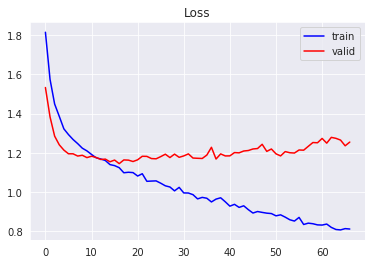

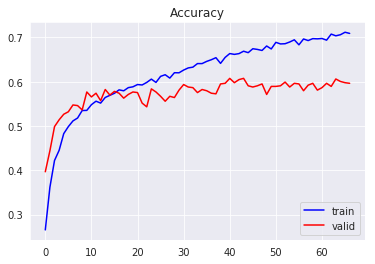

In [28]:
train_loss = model_history.history['loss']
train_acc = model_history.history['acc']
valid_loss = model_history.history['val_loss']
valid_acc = model_history.history['val_acc']
plt.plot(train_loss, 'b', label='train')
plt.plot(valid_loss, 'r', label='valid')
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(train_acc, 'b', label='train')
plt.plot(valid_acc, 'r', label='valid')
plt.legend(loc=4)
plt.title("Accuracy")
plt.show()

In [29]:
# load the saved model
from tensorflow.keras.models import load_model
saved_model = load_model('best_model2.h5')
y_predict = saved_model.predict_classes(test)
y_predict

array([2, 1, 4, ..., 1, 2, 4])

In [30]:
sub = pd.DataFrame()
sub['ID'] = test_ID
sub['class'] = y_predict
sub.to_csv('submission2.csv',index=False)